In [1]:
%store -r y

In [2]:
%store -r X_normalized

In [3]:
%store -r X_normalized_PCA3

In [4]:
%store -r X_normalized_PCA2

In [5]:
import pandas as pd

In [6]:
from sklearn.metrics import silhouette_score

In [7]:
from sklearn.cluster import KMeans

In [8]:
from matplotlib import pyplot as plt

In [9]:
from matplotlib.colors import ListedColormap

In [10]:
from mpl_toolkits import mplot3d

In [11]:
from sklearn.decomposition import PCA

In [12]:
color_list = ['red', 'blue', 'green', 'yellow', 'pink', 'purple', 'orange', 'brown', 'gray', 'magenta', 'cyan']

In [26]:
#pukao je vise puta pri kraju izvravanja dole pa zato pocinju ovi brojevi in-a, ali svakako ovo su azurni rezultati

In [13]:
#kmeans

In [14]:
#primenjujemo kmeans na normalizovani skup podataka(vizualizujemo sa 3 dimenzije)

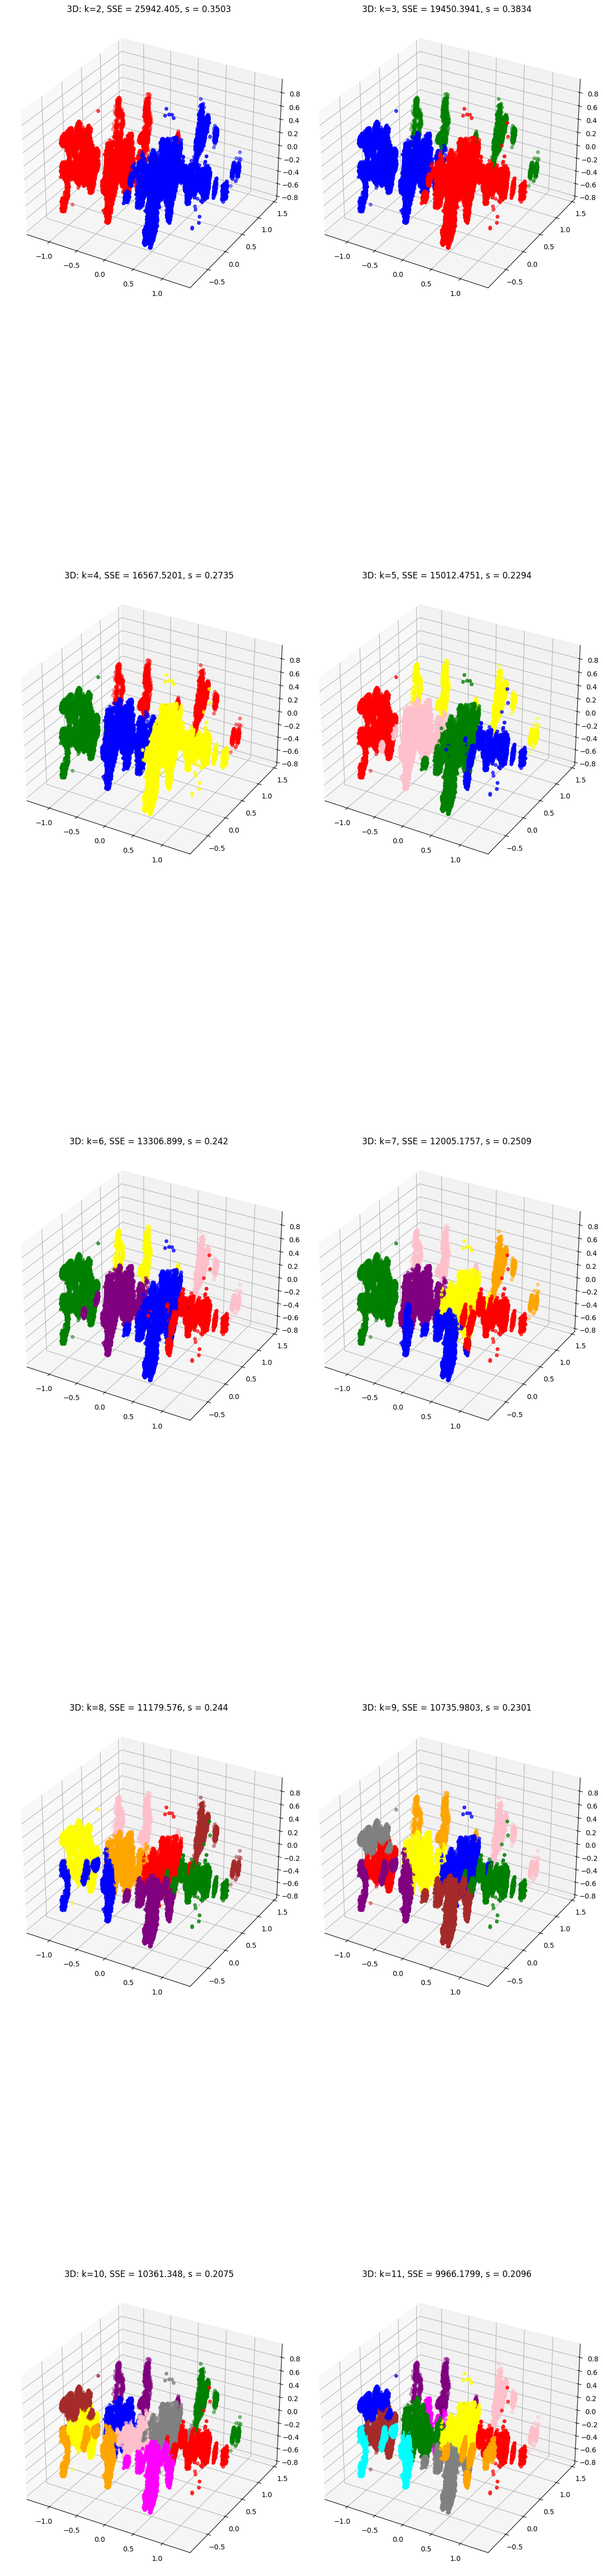

In [15]:
ks = range(2, 12)
inits = ['k-means++']
idx = 1
fig = plt.figure(figsize=(12, 60))
sse_scores2 = []
silhouette_scores2 = []

for k in ks:
    for init in inits:
        kmeans = KMeans(n_clusters=k, init=init, n_init=10)
        kmeans.fit(X_normalized)
        
        sse_score = round(kmeans.inertia_, 4)
        sse_scores2.append(sse_score)
        
        sil_score = round(silhouette_score(X_normalized, kmeans.labels_), 4)
        silhouette_scores2.append(sil_score)
        
        ax = fig.add_subplot(int(len(ks)/2), 2, idx, projection ='3d')
        idx += 1
        ax.scatter(X_normalized_PCA3.iloc[:, 0], X_normalized_PCA3.iloc[:, 1],
                   X_normalized_PCA3.iloc[:, 2], c=kmeans.labels_, cmap= ListedColormap(color_list[:k]))
        plt.title(f'3D: k={k}, SSE = {sse_score}, s = {sil_score} ')    
plt.tight_layout()

In [16]:
#sse i silhouette_score za razlicite k

Text(0.5, 1.0, 'Silueta za razlicite k')

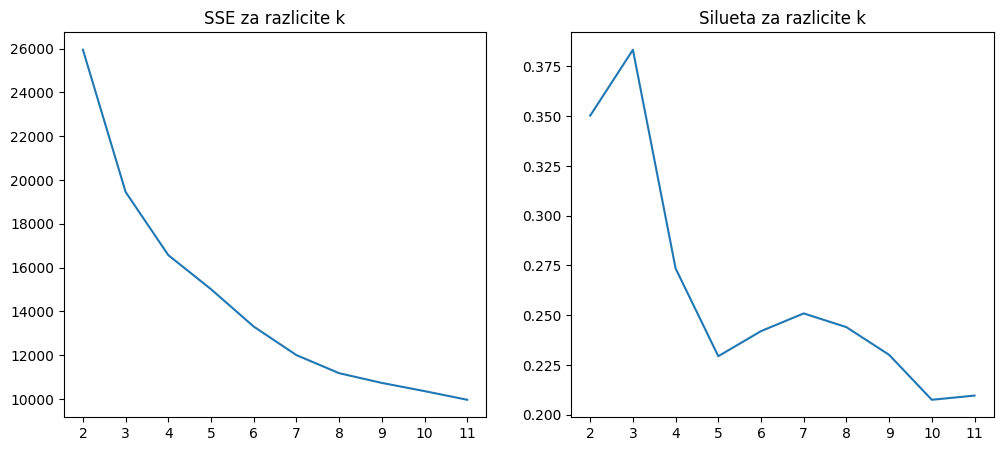

In [17]:
fig = plt.figure(figsize=(12, 5))

x = [f'{i}' for i in ks]

fig.add_subplot(1, 2, 1)
y1 = sse_scores2
plt.plot(x, y1)
plt.title('SSE za razlicite k')

fig.add_subplot(1, 2, 2)
y2 = silhouette_scores2
plt.plot(x, y2)
plt.title('Silueta za razlicite k')

In [18]:
#primenjujemo kmeans na normalizovani PCA3 skup podataka(vizualizujemo sa 3 dimenzije)

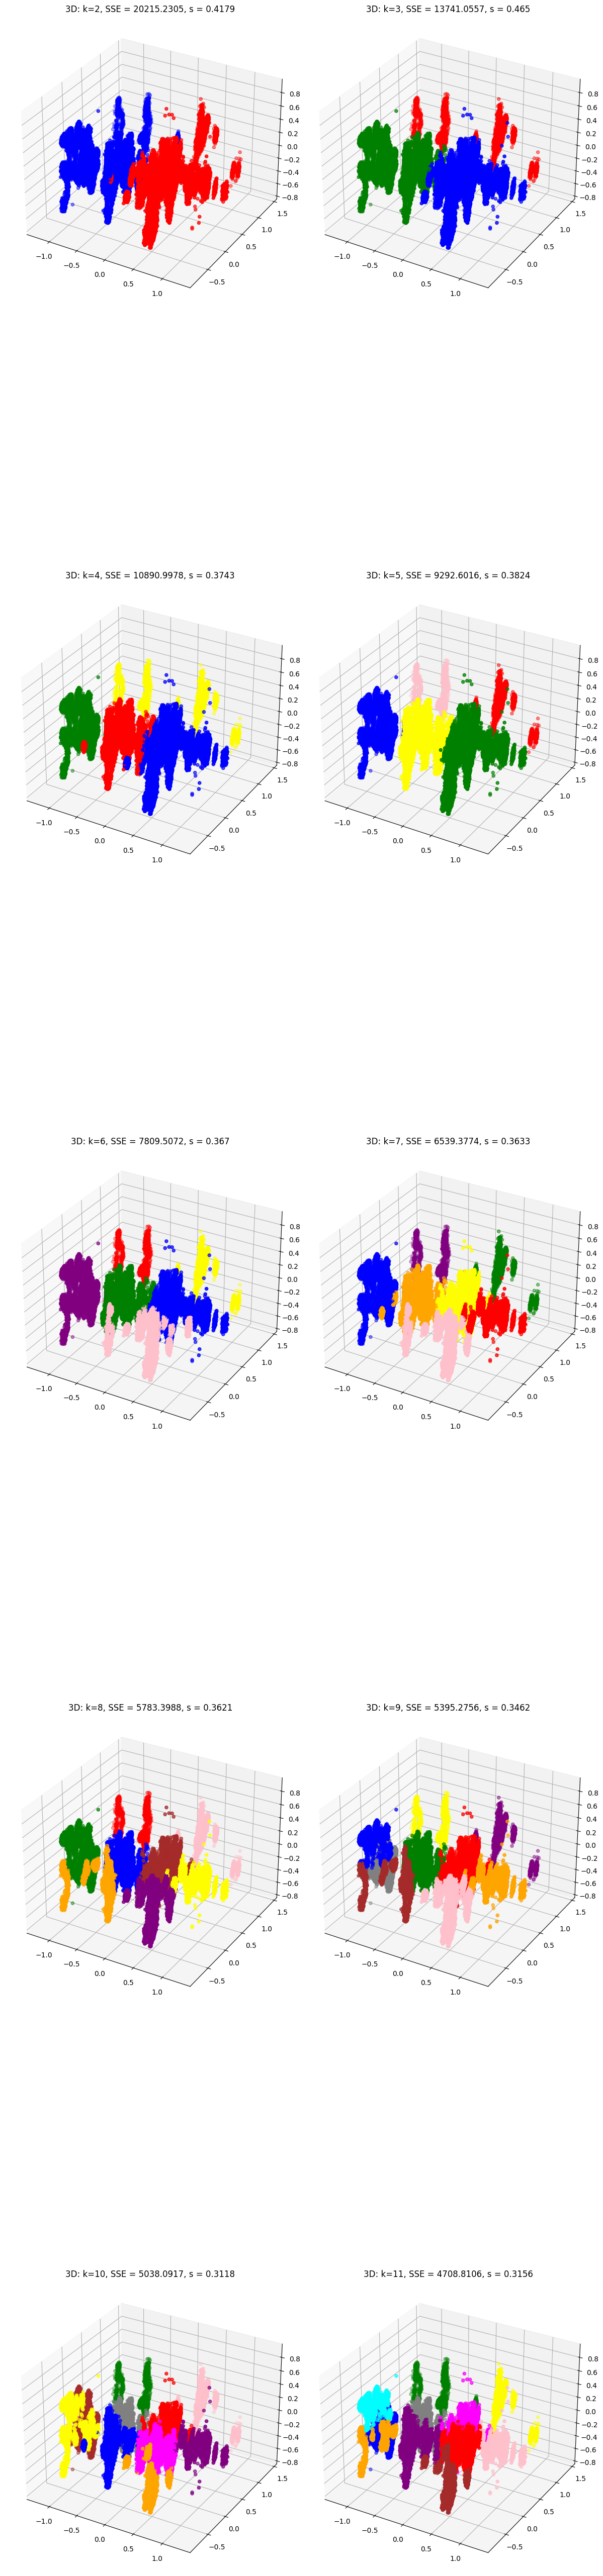

In [19]:
ks = range(2, 12)
inits = ['k-means++']
idx = 1
fig = plt.figure(figsize=(12, 60))
sse_scores3 = []
silhouette_scores3 = []

for k in ks:
    for init in inits:
        kmeans = KMeans(n_clusters=k, init=init, n_init=10)
        kmeans.fit(X_normalized_PCA3)
        
        sse_score = round(kmeans.inertia_, 4)
        sse_scores3.append(sse_score)
        
        sil_score = round(silhouette_score(X_normalized_PCA3, kmeans.labels_), 4)
        silhouette_scores3.append(sil_score)
        
        ax = fig.add_subplot(int(len(ks)/2), 2, idx, projection ='3d')
        idx += 1
        ax.scatter(X_normalized_PCA3.iloc[:, 0], X_normalized_PCA3.iloc[:, 1],
                   X_normalized_PCA3.iloc[:, 2], c=kmeans.labels_, cmap= ListedColormap(color_list[:k]))
        plt.title(f'3D: k={k}, SSE = {sse_score}, s = {sil_score}')     
plt.tight_layout()

In [20]:
#sse i silhouette_score za razlicite k

Text(0.5, 1.0, 'Silueta za razlicite k')

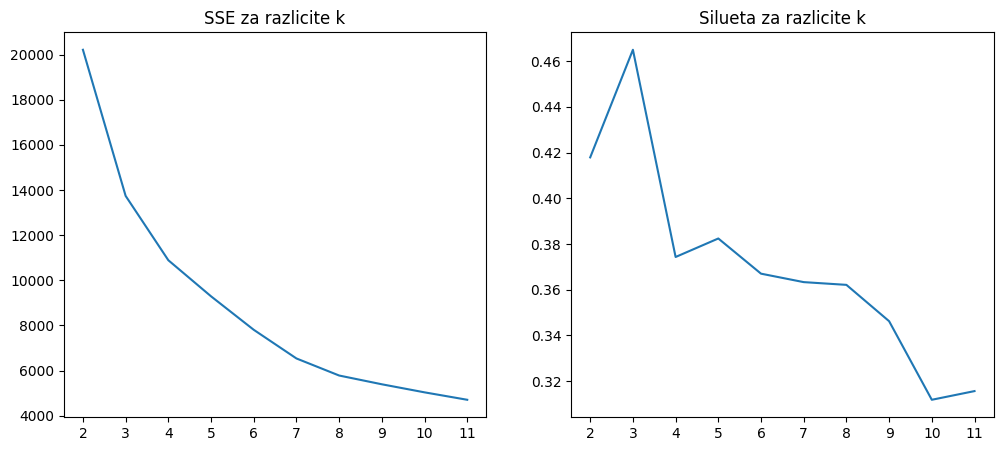

In [21]:
fig = plt.figure(figsize=(12, 5))

x = [f'{i}' for i in ks]

fig.add_subplot(1, 2, 1)
y1 = sse_scores3
plt.plot(x, y1)
plt.title('SSE za razlicite k')

fig.add_subplot(1, 2, 2)
y2 = silhouette_scores3
plt.plot(x, y2)
plt.title('Silueta za razlicite k')

In [13]:
#agglomerative

In [14]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
#agglomerative je algoritam O(n^2*logn) slozenosti, pa ne moze raditi nad celim skupom vec uzimamo uzorak

In [16]:
n = 11
numOfClassInstances = int(len(X_normalized_PCA3) / n)
numOfClassSamples = 1500
X_curr_sampled = []
instance_samples = []
for i in range(n):
    X_curr = X_normalized_PCA3.iloc[i*numOfClassInstances : (i+1)*numOfClassInstances, :]
    X_curr_sampled.append(X_curr.sample(numOfClassSamples))
    instance_samples.append(X_curr.sample(1))
X_normalized_PCA3_sampled = pd.concat(X_curr_sampled, axis=0)
#X_normalized_PCA3_sampled

In [17]:
X_normalized_PCA2_sampled = X_normalized_PCA3_sampled.iloc[:, :2]
#X_normalized_PCA2_sampled

In [22]:
#poredjenje algoritma pri pravljenju 11 klastera za razlicite vrste veza

In [23]:
#3D

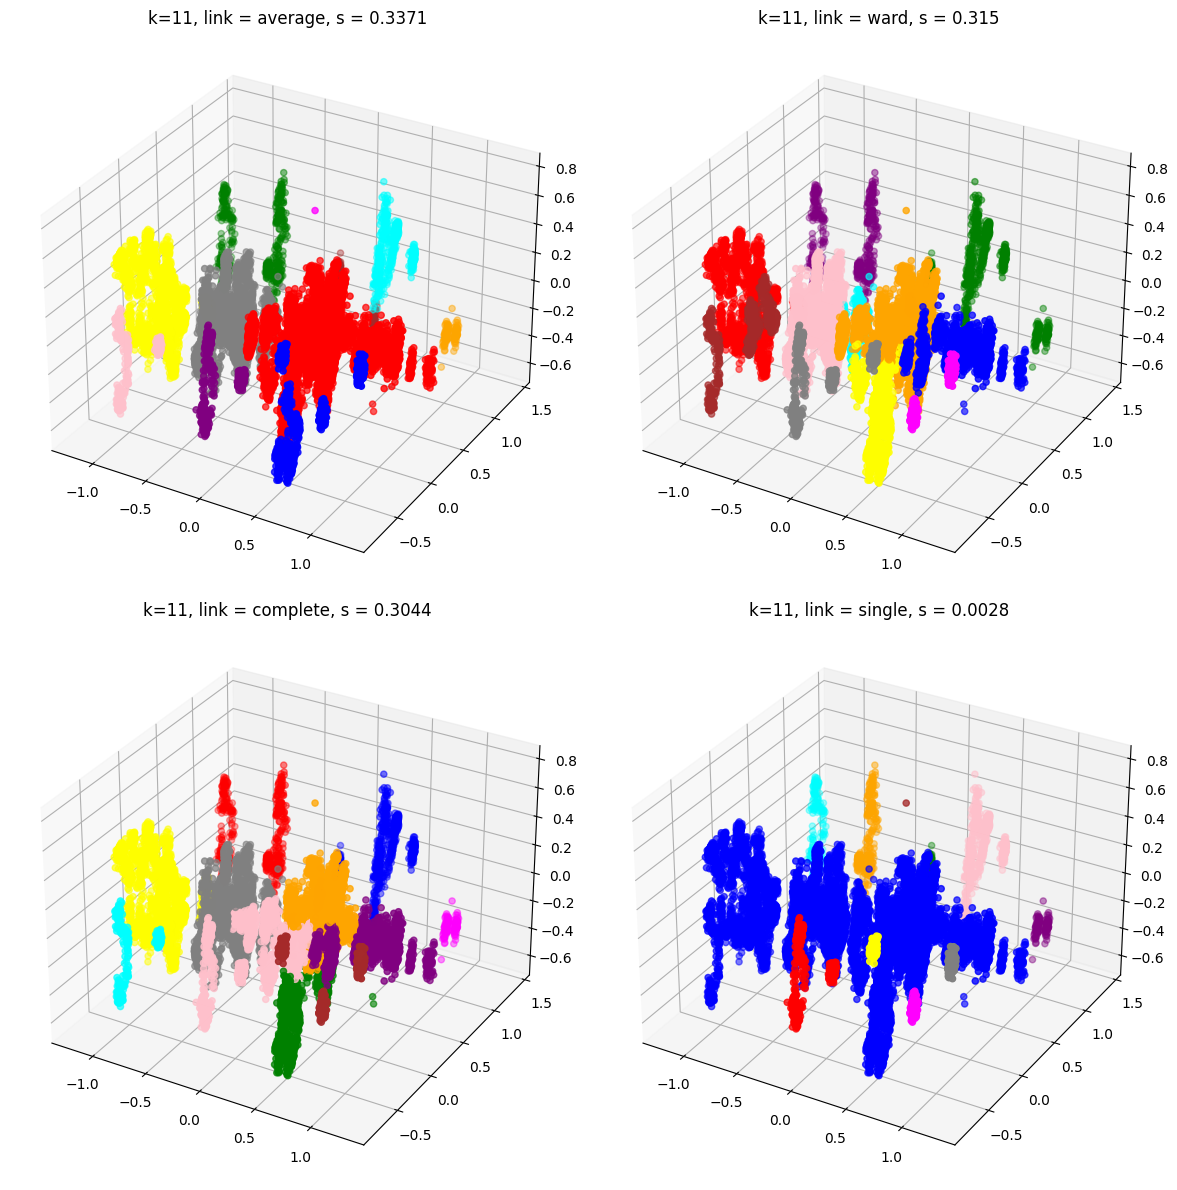

In [24]:
ks = [11]
linkages = ['average', 'ward', 'complete', 'single']
fig = plt.figure(figsize = (12, 12))
idx = 1

scores_for_linkages = []

for k in ks:
    for linkage in linkages:
        ac = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        ac.fit(X_normalized_PCA3_sampled)
        
        ax = fig.add_subplot(int(len(linkages)/2), int(len(linkages)/2), idx, projection='3d')
        idx += 1
    
        ax.scatter(X_normalized_PCA3_sampled.iloc[:, 0], X_normalized_PCA3_sampled.iloc[:, 1],
                   X_normalized_PCA3_sampled.iloc[:, 2], c=ac.labels_, cmap=ListedColormap(color_list[:k]))
        
        score = round(silhouette_score(X_normalized_PCA3_sampled, ac.labels_), 4)
        scores_for_linkages.append(score)
        
        plt.title(f'k={k}, link = {linkage}, s = {score}')
plt.tight_layout()

In [30]:
#crtamo dendogram

In [31]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [32]:
Z = linkage(X_normalized_PCA3_sampled, method='average')
Z

array([[6.68900000e+03, 7.31900000e+03, 4.14926213e-04, 2.00000000e+00],
       [1.59270000e+04, 1.60550000e+04, 5.15894216e-04, 2.00000000e+00],
       [1.26150000e+04, 1.30090000e+04, 5.73622438e-04, 2.00000000e+00],
       ...,
       [3.29830000e+04, 3.29920000e+04, 1.17559893e+00, 1.50000000e+03],
       [3.29930000e+04, 3.29950000e+04, 1.28008437e+00, 1.50000000e+04],
       [3.29960000e+04, 3.29970000e+04, 1.57361268e+00, 1.65000000e+04]])

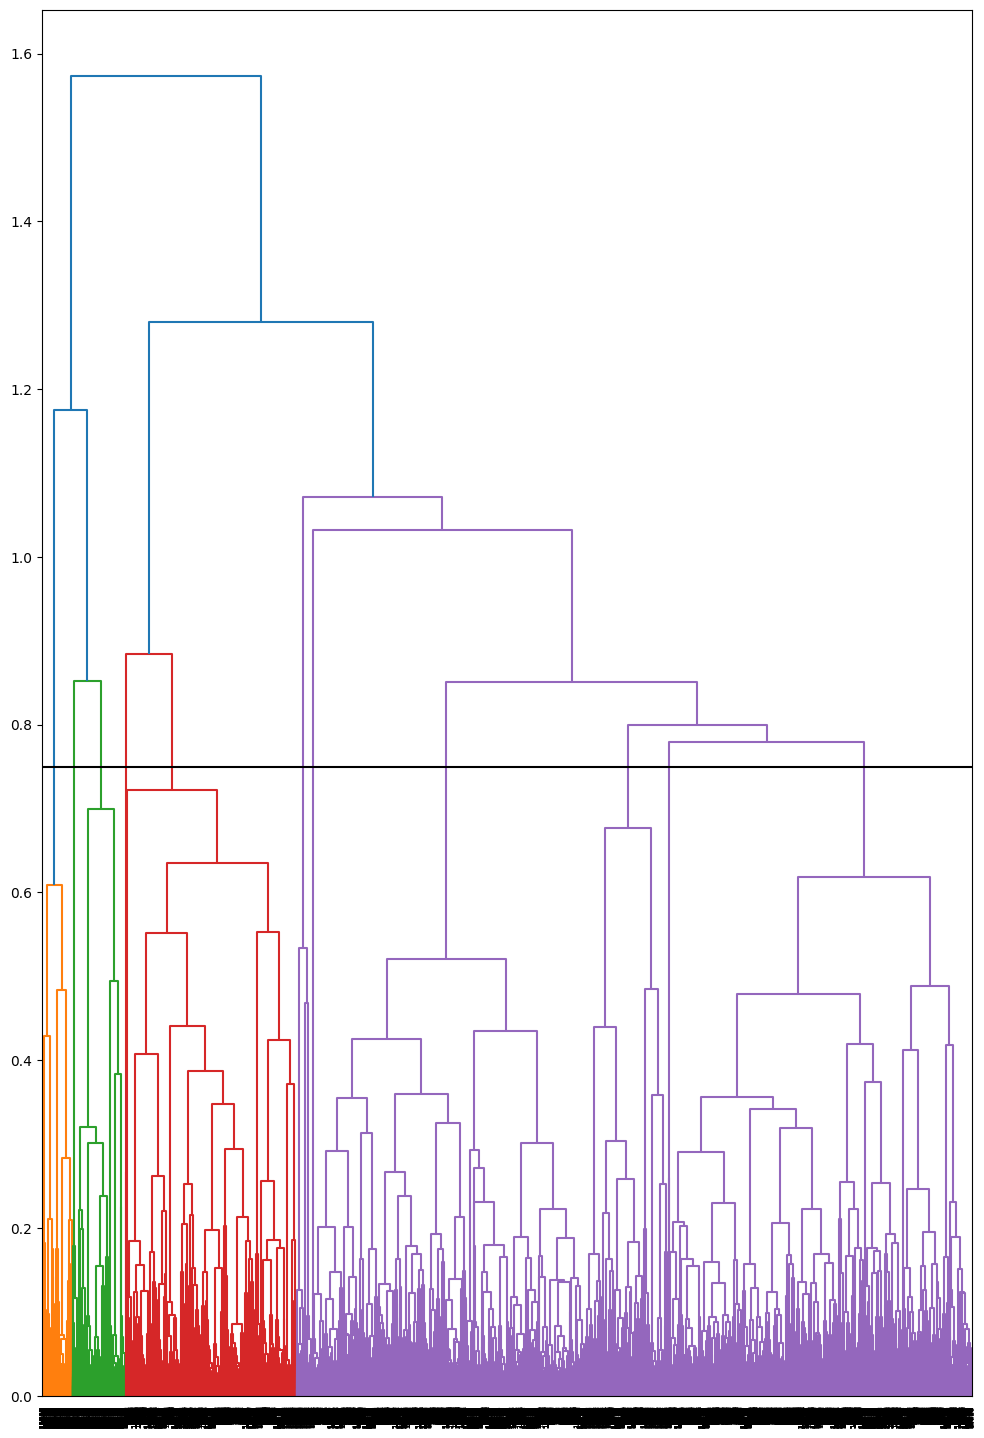

In [34]:
fig = plt.figure(figsize=(12, 18))
_ = dendrogram(Z, leaf_rotation=90)
plt.axhline(y=0.75, c='k')

In [18]:
#kmeans vs agglomerative(average) u 2D

ovde


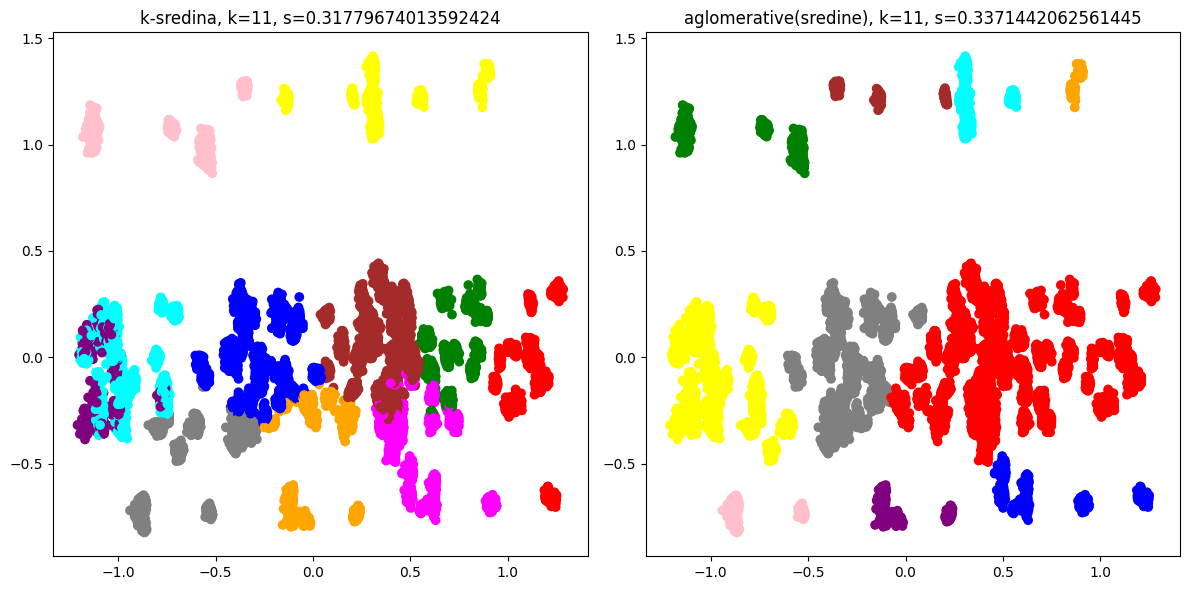

In [19]:
fig = plt.figure(figsize=(12, 6))
k=11

kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10)
kmeans.fit(X_normalized_PCA3_sampled)

ax = fig.add_subplot(1, 2, 1)
ax.scatter(X_normalized_PCA2_sampled.iloc[:, 0], X_normalized_PCA2_sampled.iloc[:, 1],
           c=kmeans.labels_, cmap= ListedColormap(color_list[:k]))
score_k = silhouette_score(X_normalized_PCA3_sampled, kmeans.labels_)
plt.title(f'k-sredina, k={k}, s={score_k}')
print('ovde')

ag = AgglomerativeClustering(n_clusters=k, linkage='average')
ag.fit(X_normalized_PCA3_sampled)

ax = fig.add_subplot(1, 2, 2)
ax.scatter(X_normalized_PCA2_sampled.iloc[:, 0], X_normalized_PCA2_sampled.iloc[:, 1],
           c=ag.labels_, cmap= ListedColormap(color_list[:k]))
score_a = silhouette_score(X_normalized_PCA3_sampled, ag.labels_)
plt.title(f'aglomerative(sredine), k={k}, s={score_a}')
          
plt.tight_layout()

In [20]:
#kmeans vs agglomerative(ward) u 2D

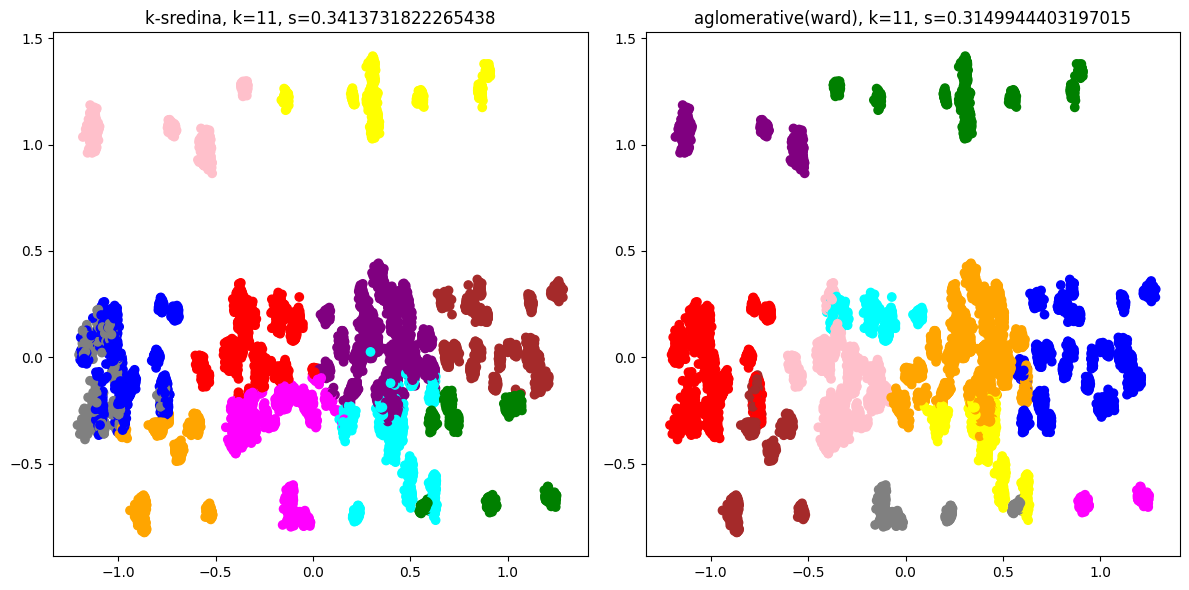

In [21]:
fig = plt.figure(figsize=(12, 6))
k=11

kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10)
kmeans.fit(X_normalized_PCA3_sampled)

ax = fig.add_subplot(1, 2, 1)
ax.scatter(X_normalized_PCA2_sampled.iloc[:, 0], X_normalized_PCA2_sampled.iloc[:, 1],
           c=kmeans.labels_, cmap= ListedColormap(color_list[:k]))
score_k = silhouette_score(X_normalized_PCA3_sampled, kmeans.labels_)
plt.title(f'k-sredina, k={k}, s={score_k}')


ag = AgglomerativeClustering(n_clusters=k, linkage='ward')
ag.fit(X_normalized_PCA3_sampled)

ax = fig.add_subplot(1, 2, 2)
ax.scatter(X_normalized_PCA2_sampled.iloc[:, 0], X_normalized_PCA2_sampled.iloc[:, 1],
           c=ag.labels_, cmap= ListedColormap(color_list[:k]))
score_a = silhouette_score(X_normalized_PCA3_sampled, ag.labels_)
plt.title(f'aglomerative(ward), k={k}, s={score_a}')
          
plt.tight_layout()